In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import boxcox, shapiro, kstest, normaltest, skew

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1) Problem statement =========================================

In [ ]:
['full_name', 'brand_name', 'model', 'min_price', 'max_price', 'selling_price', 'year', 'seller_type',
 'km_driven', 'owner_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power','seats']

To predict the price of cars by their specification and km driven

# 2)  Data Gathering ==============================================

In [2]:
df = pd.read_csv("Cleaned_cardekho_data.csv")
df

full_name brand_name               model  min_price  \
0              Maruti Alto Std     Maruti            Alto Std        NaN   
1            Hyundai Grand i10    Hyundai           Grand i10   711000.0   
2             Hyundai i20 Asta    Hyundai            i20 Asta        NaN   
3              Maruti Alto K10     Maruti            Alto K10        NaN   
4      Ford Ecosport 2015-2021       Ford  Ecosport 2015-2021  1014000.0   
...                        ...        ...                 ...        ...   
20021    Toyota Platinum Etios     Toyota      Platinum Etios        NaN   
20022       Maruti Ertiga BSIV     Maruti         Ertiga BSIV        NaN   
20023          Skoda Rapid 1.5      Skoda           Rapid 1.5        NaN   
20024       Mahindra XUV500 W6   Mahindra           XUV500 W6  1783000.0   
20025        Honda City i-VTEC      Honda         City i-VTEC        NaN   

       max_price  selling_price  year  seller_type  km_driven  owner_type  \
0            NaN         120000  2012            2     120000           1   
1       748000.0         550000  2016            2      20000           1   
2            NaN         215000  2010            2      60000           1   
3            NaN         226000  2012            2      37000           1   
4      1379000.0         570000  2015            1      30000           1   
...          ...            ...   ...          ...        ...         ...   
20021        NaN         650000  2017            1      69480           1   
20022        NaN         925000  2019            1      18000           1   
20023        NaN         425000  2015            1      67000           1   
20024  2491000.0        1225000  2016            1    3800000           1   
20025        NaN        1200000  2019            1      13000           1   

       fuel_type  transmission_type  mileage  engine  max_power  seats  
0              2                  0    19.70     796      46.30      5  
1              2                  0    18.90    1197      82.00      5  
2              2                  0    17.00    1197      80.00      5  
3              2                  0    20.92     998      67.10      5  
4              1                  0    22.77    1498      98.59      5  
...          ...                ...      ...     ...        ...    ...  
20021          1                  0    23.59    1364      67.05      5  
20022          2                  0    17.50    1373      91.10      7  
20023          1                  0    21.14    1498     103.52      5  
20024          1                  0    16.00    2179     140.00      7  
20025          2                  1    18.00    1497     117.60      5  

[20026 rows x 16 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          20026 non-null  object 
 1   brand_name         20026 non-null  object 
 2   model              20026 non-null  object 
 3   min_price          9566 non-null   float64
 4   max_price          9566 non-null   float64
 5   selling_price      20026 non-null  int64  
 6   year               20026 non-null  int64  
 7   seller_type        20026 non-null  int64  
 8   km_driven          20026 non-null  int64  
 9   owner_type         20026 non-null  int64  
 10  fuel_type          20026 non-null  int64  
 11  transmission_type  20026 non-null  int64  
 12  mileage            20026 non-null  float64
 13  engine             20026 non-null  int64  
 14  max_power          20026 non-null  float64
 15  seats              20026 non-null  int64  
dtypes: float64(4), int64(9

# 3) EDA =====================================================

#### 1) full_name

In [4]:
df['full_name'].isna().sum()

0

#### 2) brand_name

In [5]:
df['brand_name'].isna().sum()

0

#### 3) model

In [6]:
df['model'].isna().sum()

0

#### 4) min_price

In [7]:
df['min_price'].isna().mean() * 100

52.23209827224608

#### 5) max_price

In [8]:
df['max_price'].isna().mean() * 100

52.23209827224608

#### 6) selling_price

In [9]:
df['selling_price'].isna().sum()

0

<AxesSubplot: xlabel='selling_price', ylabel='Density'>

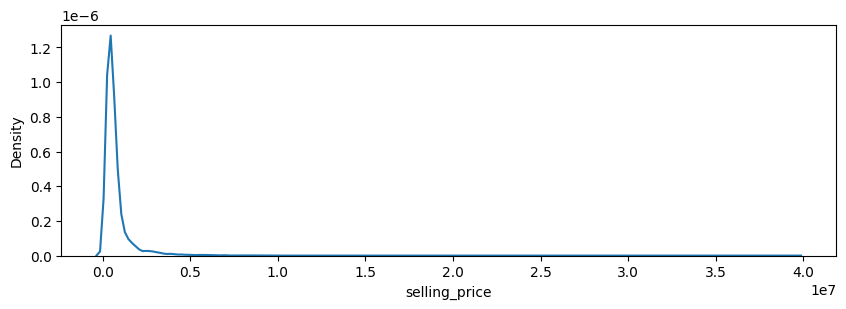

In [10]:
plt.figure(figsize = (10, 3))
sns.kdeplot(df['selling_price'])

<AxesSubplot: xlabel='selling_price'>

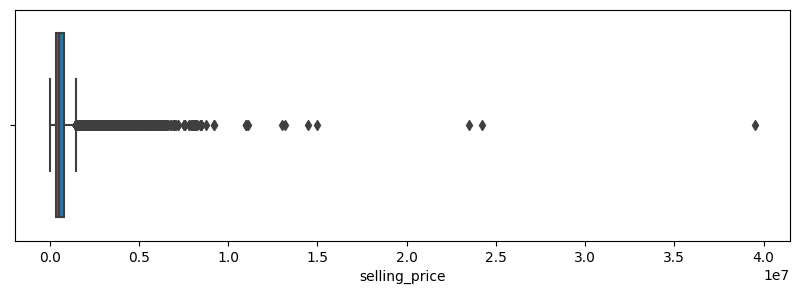

In [11]:
plt.figure(figsize = (10, 3))
sns.boxplot(x= df['selling_price'])

<AxesSubplot: xlabel='selling_price', ylabel='Density'>

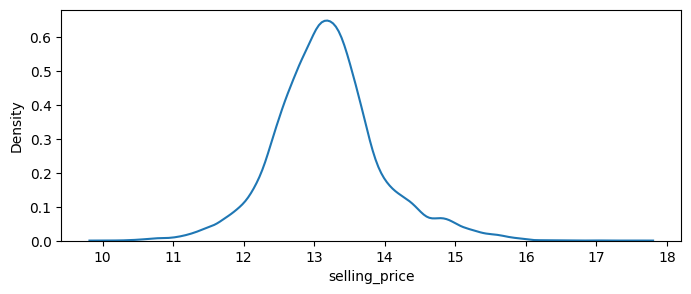

In [12]:
plt.figure(figsize = (8, 3))
sns.kdeplot(np.log(df['selling_price']))

In [13]:
skew(np.log(df['selling_price']))

0.3829146263576794

<AxesSubplot: xlabel='selling_price'>

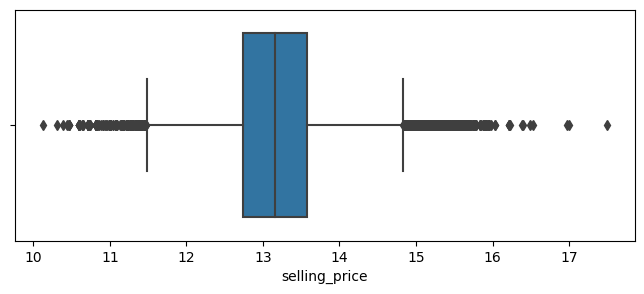

In [14]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = np.log(df['selling_price']))

In [20]:
np.log(df['selling_price']).quantile(0.01)

11.407564949312402

#### 7) km_driven

In [626]:
df['km_driven'].isna().sum()

0

<AxesSubplot: xlabel='km_driven', ylabel='Density'>

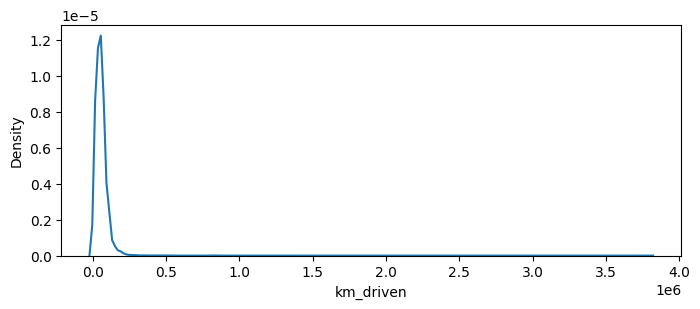

In [627]:
plt.figure(figsize = (8, 3))
sns.kdeplot(df['km_driven'])

<AxesSubplot: xlabel='km_driven'>

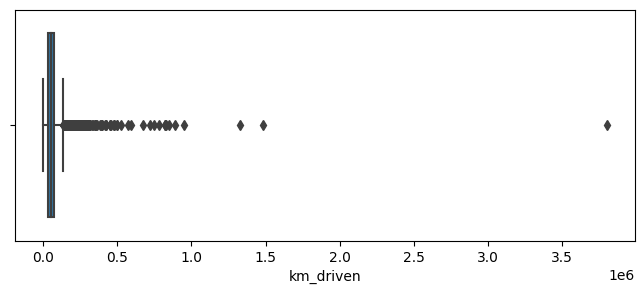

In [628]:
plt.figure(figsize = (8, 3))
sns.boxplot(x= df['km_driven'])

<AxesSubplot: xlabel='km_driven', ylabel='Density'>

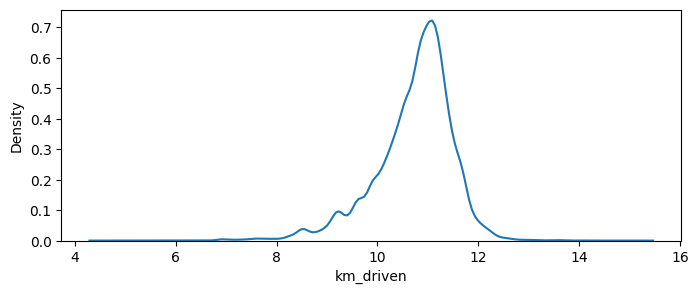

In [629]:
plt.figure(figsize = (8, 3))
sns.kdeplot(np.log(df['km_driven']))

<AxesSubplot: xlabel='km_driven'>

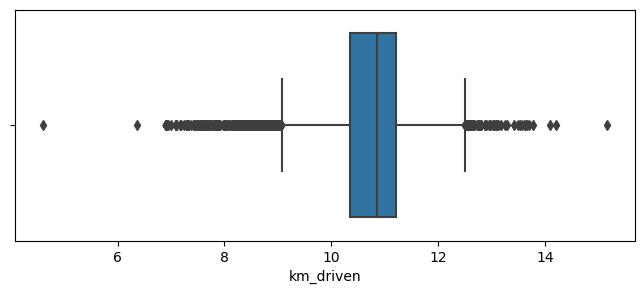

In [630]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = np.log(df['km_driven']))

In [631]:
skew(np.log(df['km_driven']))

-1.0407031334861339

#### 8) mileage

In [632]:
df['mileage'].isna().sum()

0

<AxesSubplot: xlabel='mileage', ylabel='Density'>

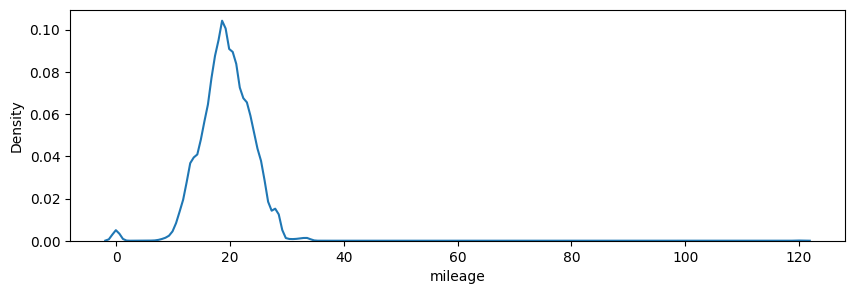

In [633]:
plt.figure(figsize= (10, 3))
sns.kdeplot(df['mileage'])

<AxesSubplot: xlabel='mileage'>

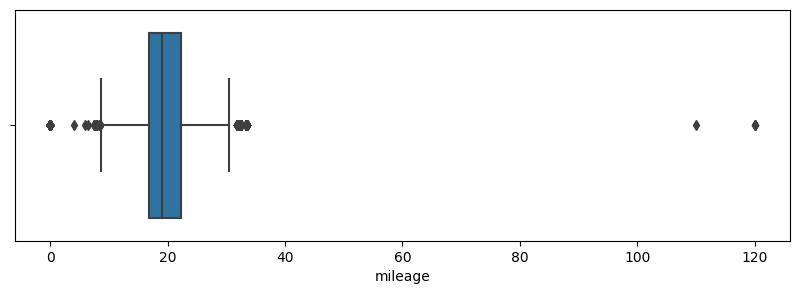

In [634]:
plt.figure(figsize= (10, 3))
sns.boxplot(x = df['mileage'])

In [636]:
df[df['mileage'] < 2]

full_name     brand_name         model  min_price  \
146           Hyundai Santro LP        Hyundai     Santro LP   551000.0   
270           Hyundai Santro AT        Hyundai     Santro AT   533000.0   
304            Ford Figo Aspire           Ford   Figo Aspire   928000.0   
352         Hyundai Santro Xing        Hyundai   Santro Xing        NaN   
421         Toyota Fortuner 4X2         Toyota  Fortuner 4X2  3594000.0   
...                         ...            ...           ...        ...   
19818      Hyundai Kona Premium        Hyundai  Kona Premium  2508000.0   
19870          Mahindra Jeep MM       Mahindra       Jeep MM        NaN   
19926       Toyota Fortuner 4X2         Toyota  Fortuner 4X2  3594000.0   
20014       Hyundai Santro Xing        Hyundai   Santro Xing        NaN   
20016  Mercedes-Benz M-Class ML  Mercedes-Benz    M-Class ML        NaN   

       max_price  selling_price  year  seller_type  km_driven  owner_type  \
146     746000.0         160000  2007            2      54000           1   
270     727000.0          71000  2004            2     110000           1   
304     966000.0         550000  2017            2      15000           1   
352          NaN         115000  2005            2     120000           1   
421    3776000.0        1235000  2012            1      85000           1   
...          ...            ...   ...          ...        ...         ...   
19818  2528000.0        2175000  2019            1       6000           1   
19870        NaN         350000  2006            2     120000           1   
19926  3776000.0        1450000  2014            1     127000           1   
20014        NaN         115000  2008            2      80000           1   
20016        NaN        3200000  2014            1      32000           1   

       fuel_type  transmission_type  mileage  engine  max_power  seats  
146            2                  0      0.0     999      74.00      5  
270            2                  1      0.0     999      74.00      5  
304            1                  0      0.0    1498      99.00      5  
352            2                  0      0.0    1086      74.00      5  
421            2                  1      0.0    2694     163.05      7  
...          ...                ...      ...     ...        ...    ...  
19818          5                  1      0.0    1197     134.10      5  
19870          1                  0      0.0    2498      74.00      6  
19926          2                  1      0.0    2694     163.05      7  
20014          2                  0      0.0    1086      62.00      5  
20016          1                  1      0.0    2987     165.00      5  

[160 rows x 16 columns]

In [635]:
df['mileage'].isna().mean() * 100

0.0

In [637]:
index = np.where(df['mileage'] < 2)
df['mileage'].loc[df['mileage'] < 2] = np.nan

In [638]:
df['mileage'].replace({np.nan : df['mileage'].median()}, inplace= True)

In [639]:
df[df['mileage'] == 0]

Empty DataFrame
Columns: [full_name, brand_name, model, min_price, max_price, selling_price, year, seller_type, km_driven, owner_type, fuel_type, transmission_type, mileage, engine, max_power, seats]
Index: []

<AxesSubplot: xlabel='mileage', ylabel='Density'>

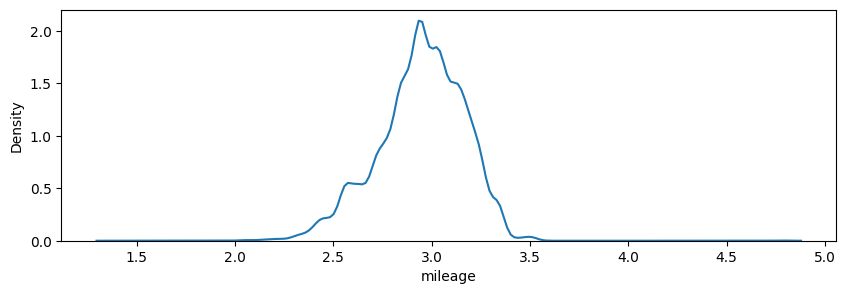

In [640]:
plt.figure(figsize= (10, 3))
sns.kdeplot(np.log(df['mileage']))

<AxesSubplot: xlabel='mileage'>

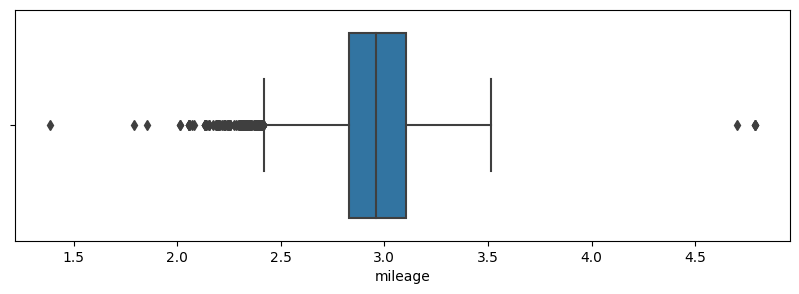

In [641]:
plt.figure(figsize= (10, 3))
sns.boxplot(x = np.log(df['mileage']))

#### 9) engine

In [642]:
df['engine'].isna().sum()

0

<AxesSubplot: xlabel='engine', ylabel='Density'>

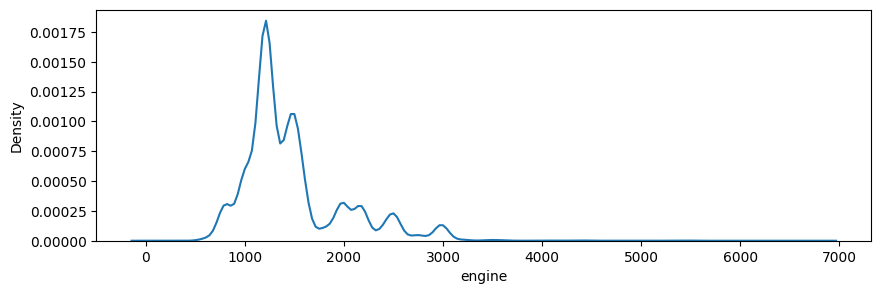

In [643]:
plt.figure(figsize= (10, 3))
sns.kdeplot(df['engine'])

<AxesSubplot: xlabel='engine'>

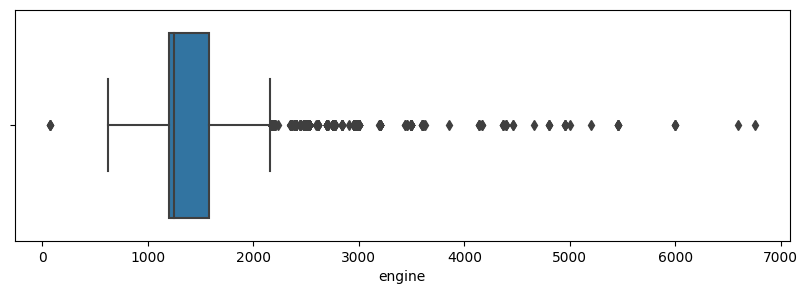

In [644]:
plt.figure(figsize= (10, 3))
sns.boxplot(x = df['engine'])

In [645]:
df.loc[df['engine'] < 624]

full_name brand_name     model  min_price  max_price  \
2354   Mahindra E Verito   Mahindra  E Verito  1075000.0  1111000.0   
17429  Mahindra E Verito   Mahindra  E Verito  1339000.0  1377000.0   
19135  Mahindra E Verito   Mahindra  E Verito        NaN        NaN   

       selling_price  year  seller_type  km_driven  owner_type  fuel_type  \
2354          945000  2020            1       2746           1          5   
17429        1197000  2019            2      18281           1          5   
19135         725000  2020            1       8200           1          5   

       transmission_type  mileage  engine  max_power  seats  
2354                   1    19.27      72      41.57      5  
17429                  1    19.27      72      41.57      5  
19135                  1    19.27      72      41.57      5

<AxesSubplot: xlabel='engine', ylabel='Density'>

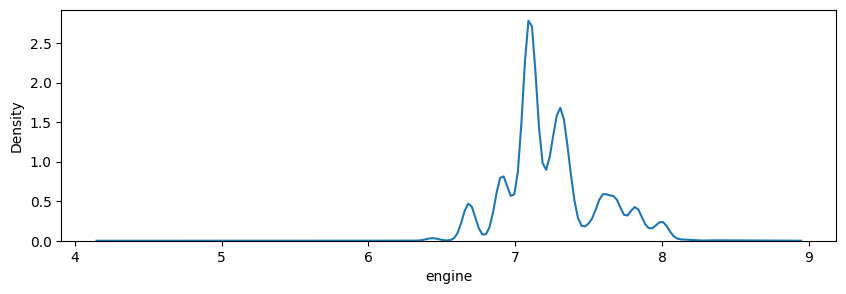

In [646]:
plt.figure(figsize= (10, 3))
sns.kdeplot(np.log(df['engine']))

<AxesSubplot: xlabel='engine'>

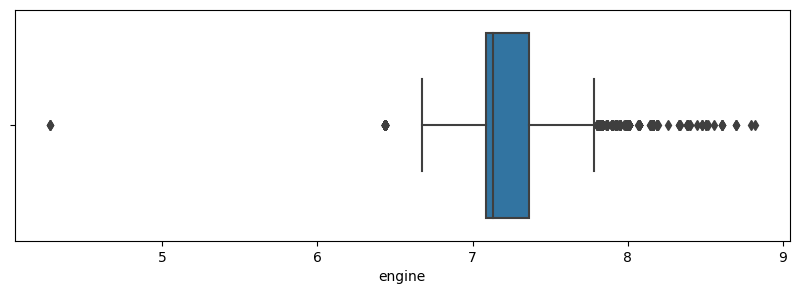

In [647]:
plt.figure(figsize= (10, 3))
sns.boxplot(x = np.log(df['engine']))

In [648]:
skew(np.log(df['engine']))

0.4865417601266238

In [649]:
boxcox([2, 1])

(array([0.69314549, 0.        ]), -7.050036447335159e-06)

<AxesSubplot: ylabel='Density'>

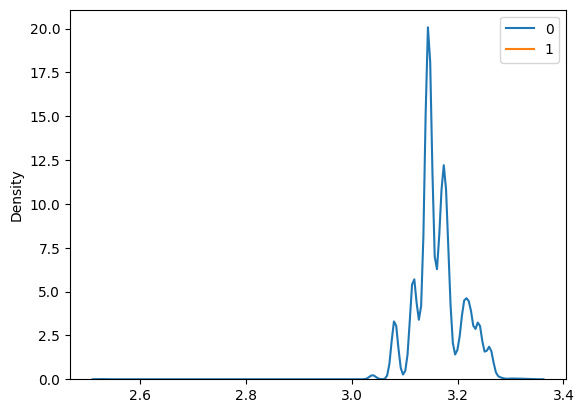

In [650]:
sns.kdeplot(boxcox(df['engine']))

In [651]:
skew(np.log(df['engine']))

0.4865417601266238

#### 10) max_power

In [652]:
df['max_power'].isna().sum()

0

<AxesSubplot: xlabel='max_power', ylabel='Density'>

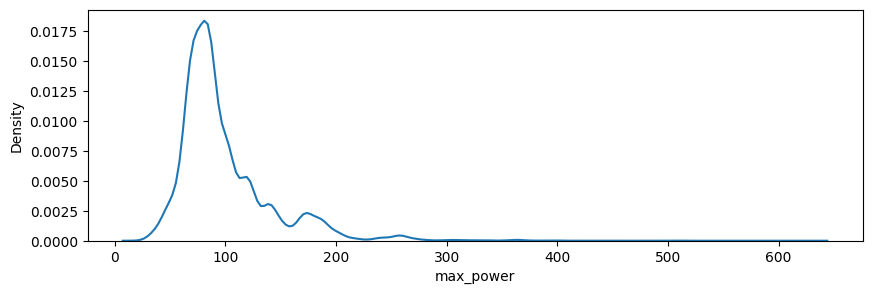

In [653]:
plt.figure(figsize = (10, 3))
sns.kdeplot(df['max_power'])

<AxesSubplot: xlabel='max_power'>

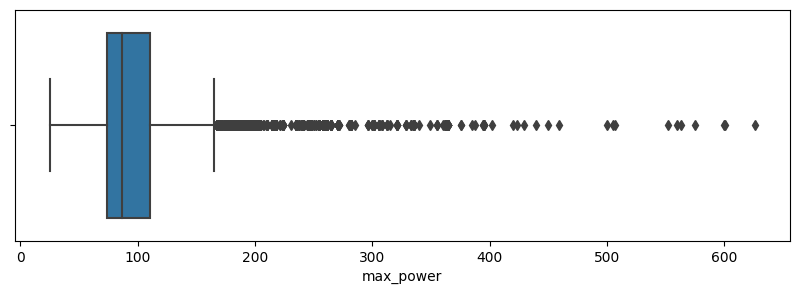

In [654]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = df['max_power'])

<AxesSubplot: ylabel='Density'>

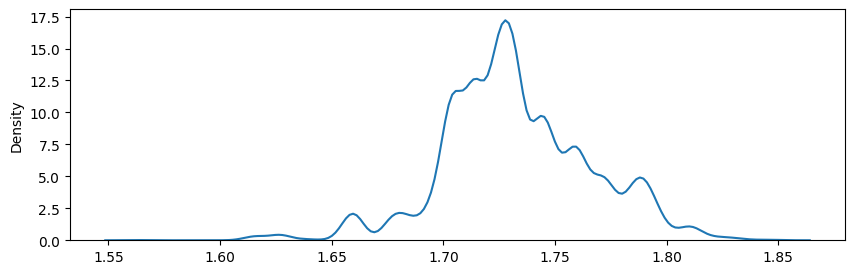

In [655]:
plt.figure(figsize = (10, 3))
sns.kdeplot(boxcox(df['max_power'])[0])

<AxesSubplot: >

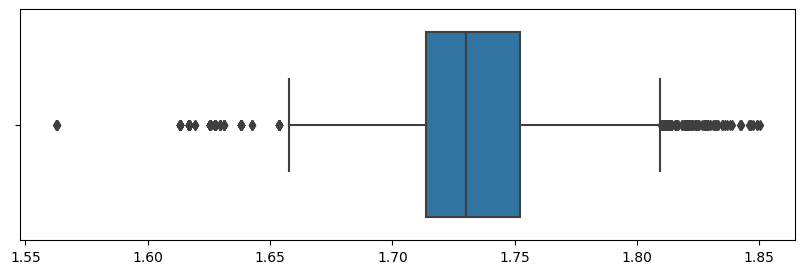

In [656]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = boxcox(df['max_power'])[0])

In [657]:
skew(np.log(df['max_power']))

0.6936377663705412

<AxesSubplot: ylabel='Density'>

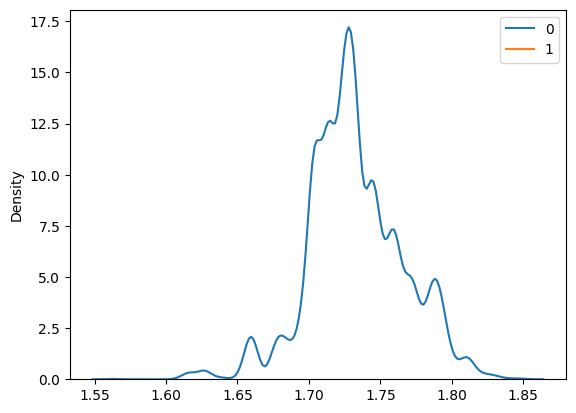

In [658]:
sns.kdeplot(boxcox(df['max_power']))

In [659]:
skew(boxcox(df['max_power'])[0])

-0.03680700424481984

#### 11) seats

In [660]:
df['seats'].isna().sum()

0

<AxesSubplot: xlabel='seats', ylabel='Density'>

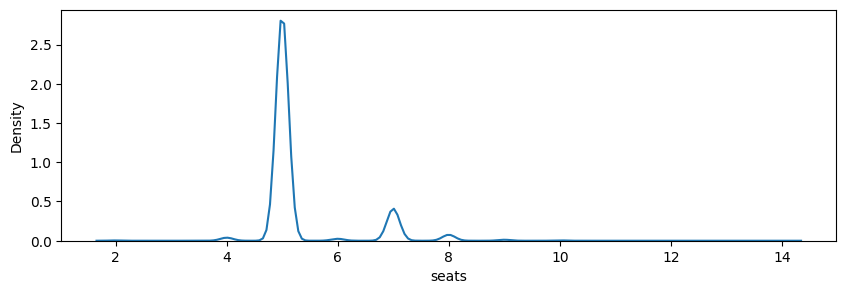

In [661]:
plt.figure(figsize= (10, 3))
sns.kdeplot(df['seats'])

<AxesSubplot: xlabel='seats'>

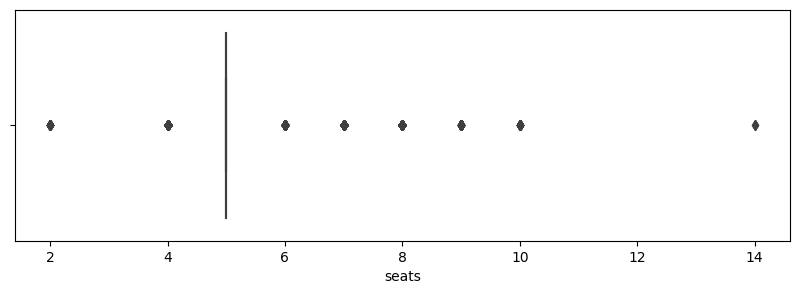

In [662]:
plt.figure(figsize= (10, 3))
sns.boxplot(x = df['seats'])

<AxesSubplot: xlabel='seats', ylabel='Density'>

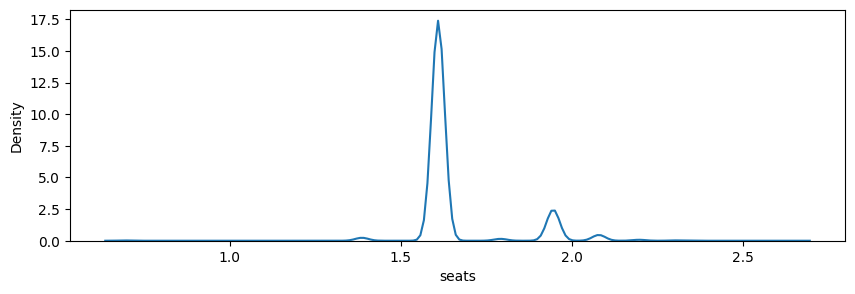

In [663]:
plt.figure(figsize= (10, 3))
sns.kdeplot(np.log(df['seats']))

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          20026 non-null  object 
 1   brand_name         20026 non-null  object 
 2   model              20026 non-null  object 
 3   min_price          9566 non-null   float64
 4   max_price          9566 non-null   float64
 5   selling_price      20026 non-null  int64  
 6   year               20026 non-null  int64  
 7   seller_type        20026 non-null  int64  
 8   km_driven          20026 non-null  int64  
 9   owner_type         20026 non-null  int64  
 10  fuel_type          20026 non-null  int64  
 11  transmission_type  20026 non-null  int64  
 12  mileage            20026 non-null  float64
 13  engine             20026 non-null  int64  
 14  max_power          20026 non-null  float64
 15  seats              20026 non-null  int64  
dtypes: float64(4), int64(9

In [665]:
df

full_name brand_name               model  min_price  \
0              Maruti Alto Std     Maruti            Alto Std        NaN   
1            Hyundai Grand i10    Hyundai           Grand i10   711000.0   
2             Hyundai i20 Asta    Hyundai            i20 Asta        NaN   
3              Maruti Alto K10     Maruti            Alto K10        NaN   
4      Ford Ecosport 2015-2021       Ford  Ecosport 2015-2021  1014000.0   
...                        ...        ...                 ...        ...   
20021    Toyota Platinum Etios     Toyota      Platinum Etios        NaN   
20022       Maruti Ertiga BSIV     Maruti         Ertiga BSIV        NaN   
20023          Skoda Rapid 1.5      Skoda           Rapid 1.5        NaN   
20024       Mahindra XUV500 W6   Mahindra           XUV500 W6  1783000.0   
20025        Honda City i-VTEC      Honda         City i-VTEC        NaN   

       max_price  selling_price  year  seller_type  km_driven  owner_type  \
0            NaN         120000  2012            2     120000           1   
1       748000.0         550000  2016            2      20000           1   
2            NaN         215000  2010            2      60000           1   
3            NaN         226000  2012            2      37000           1   
4      1379000.0         570000  2015            1      30000           1   
...          ...            ...   ...          ...        ...         ...   
20021        NaN         650000  2017            1      69480           1   
20022        NaN         925000  2019            1      18000           1   
20023        NaN         425000  2015            1      67000           1   
20024  2491000.0        1225000  2016            1    3800000           1   
20025        NaN        1200000  2019            1      13000           1   

       fuel_type  transmission_type  mileage  engine  max_power  seats  
0              2                  0    19.70     796      46.30      5  
1              2                  0    18.90    1197      82.00      5  
2              2                  0    17.00    1197      80.00      5  
3              2                  0    20.92     998      67.10      5  
4              1                  0    22.77    1498      98.59      5  
...          ...                ...      ...     ...        ...    ...  
20021          1                  0    23.59    1364      67.05      5  
20022          2                  0    17.50    1373      91.10      7  
20023          1                  0    21.14    1498     103.52      5  
20024          1                  0    16.00    2179     140.00      7  
20025          2                  1    18.00    1497     117.60      5  

[20026 rows x 16 columns]

# Feature engineering ===========================================

In [703]:
df1 = df.copy()

In [704]:
# df1

In [705]:
# df1.info()

In [706]:
columns = ['selling_price', 'engine','max_power']
new_df = df1[columns]
# df1 = df1.drop(['min_price', 'max_price'], axis = 1)

In [707]:
normal_scalar = MinMaxScaler()
array1 = normal_scalar.fit_transform(new_df)
new_df1 = pd.DataFrame(array1, columns = new_df.columns)
new_df1

selling_price    engine  max_power
0           0.002407  0.108383   0.034799
1           0.013300  0.168413   0.094239
2           0.004813  0.168413   0.090909
3           0.005092  0.138623   0.069431
4           0.013806  0.213473   0.121861
...              ...       ...        ...
20021       0.015833  0.193413   0.069347
20022       0.022799  0.194760   0.109391
20023       0.010133  0.213473   0.130070
20024       0.030399  0.315419   0.190809
20025       0.029766  0.213323   0.153513

[20026 rows x 3 columns]

In [708]:
new_df1.insert(0, "min_price", value = df1['min_price'])

In [709]:
new_df1.head(10)

min_price  selling_price    engine  max_power
0        NaN       0.002407  0.108383   0.034799
1   711000.0       0.013300  0.168413   0.094239
2        NaN       0.004813  0.168413   0.090909
3        NaN       0.005092  0.138623   0.069431
4  1014000.0       0.013806  0.213473   0.121861
5   516000.0       0.008233  0.138623   0.069431
6   654000.0       0.007346  0.168413   0.089078
7   526000.0       0.009753  0.138623   0.069331
8   770000.0       0.025966  0.138623   0.154762
9        NaN       0.013933  0.212725   0.124209

In [710]:
knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(new_df1)
filled_df = pd.DataFrame(array, columns=new_df1.columns)
filled_df.head(10)

min_price  selling_price    engine  max_power
0  3.390000e+05       0.002407  0.108383   0.034799
1  7.110000e+05       0.013300  0.168413   0.094239
2  7.830000e+05       0.004813  0.168413   0.090909
3  4.313333e+05       0.005092  0.138623   0.069431
4  1.014000e+06       0.013806  0.213473   0.121861
5  5.160000e+05       0.008233  0.138623   0.069431
6  6.540000e+05       0.007346  0.168413   0.089078
7  5.260000e+05       0.009753  0.138623   0.069331
8  7.700000e+05       0.025966  0.138623   0.154762
9  1.000333e+06       0.013933  0.212725   0.124209

In [711]:
df1['min_price'] = filled_df['min_price']

# =============================================================

In [712]:
df2 = df1.copy()

columns = ['selling_price', 'engine']
new_df = df2[columns]

normal_scalar = MinMaxScaler()
array1 = normal_scalar.fit_transform(new_df)
new_df1 = pd.DataFrame(array1, columns = new_df.columns)

new_df1.insert(0, "max_price", value = df2['max_price'])

In [713]:
knn_imputer1 = KNNImputer(n_neighbors=3)
array1 = knn_imputer1.fit_transform(new_df1)
filled_df1 = pd.DataFrame(array1, columns=new_df1.columns)
filled_df1.head(10)

max_price  selling_price    engine
0  5.133333e+05       0.002407  0.108383
1  7.480000e+05       0.013300  0.168413
2  9.096667e+05       0.004813  0.168413
3  5.796000e+06       0.005092  0.138623
4  1.379000e+06       0.013806  0.213473
5  6.940000e+05       0.008233  0.138623
6  6.630000e+05       0.007346  0.168413
7  7.010000e+05       0.009753  0.138623
8  1.302000e+06       0.025966  0.138623
9  1.648333e+06       0.013933  0.212725

In [714]:
df1['max_price'] = filled_df1['max_price']

In [775]:
df1

full_name brand_name               model     min_price  \
0              Maruti Alto Std     Maruti            Alto Std  3.390000e+05   
1            Hyundai Grand i10    Hyundai           Grand i10  7.110000e+05   
2             Hyundai i20 Asta    Hyundai            i20 Asta  7.830000e+05   
3              Maruti Alto K10     Maruti            Alto K10  4.313333e+05   
4      Ford Ecosport 2015-2021       Ford  Ecosport 2015-2021  1.014000e+06   
...                        ...        ...                 ...           ...   
20021    Toyota Platinum Etios     Toyota      Platinum Etios  8.833333e+05   
20022       Maruti Ertiga BSIV     Maruti         Ertiga BSIV  9.270000e+05   
20023          Skoda Rapid 1.5      Skoda           Rapid 1.5  1.098667e+06   
20024       Mahindra XUV500 W6   Mahindra           XUV500 W6  1.783000e+06   
20025        Honda City i-VTEC      Honda         City i-VTEC  1.297667e+06   

          max_price  selling_price  year  seller_type  km_driven  owner_type  \
0      5.133333e+05         120000  2012            2     120000           1   
1      7.480000e+05         550000  2016            2      20000           1   
2      9.096667e+05         215000  2010            2      60000           1   
3      5.796000e+06         226000  2012            2      37000           1   
4      1.379000e+06         570000  2015            1      30000           1   
...             ...            ...   ...          ...        ...         ...   
20021  6.342667e+06         650000  2017            1      69480           1   
20022  1.557000e+06         925000  2019            1      18000           1   
20023  1.698000e+06         425000  2015            1      67000           1   
20024  2.491000e+06        1225000  2016            1    3800000           1   
20025  1.681667e+06        1200000  2019            1      13000           1   

       fuel_type  transmission_type  mileage  engine  max_power  seats  
0              2                  0    19.70     796      46.30      5  
1              2                  0    18.90    1197      82.00      5  
2              2                  0    17.00    1197      80.00      5  
3              2                  0    20.92     998      67.10      5  
4              1                  0    22.77    1498      98.59      5  
...          ...                ...      ...     ...        ...    ...  
20021          1                  0    23.59    1364      67.05      5  
20022          2                  0    17.50    1373      91.10      7  
20023          1                  0    21.14    1498     103.52      5  
20024          1                  0    16.00    2179     140.00      7  
20025          2                  1    18.00    1497     117.60      5  

[20026 rows x 16 columns]

# 5) Feature selection

# 6) Model Training

In [777]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#### train_test_split

In [778]:
x = df1.drop(['selling_price', 'model'], axis=1)
y = df1['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 42)

## Creates object for one hot encoding on specified columns, which can be used for pipeline and column transformer
ohe = OneHotEncoder()
ohe.fit(x[["full_name", "brand_name"]])

OneHotEncoder()

In [779]:
# ohe.categories_ ## Returns Unique values of each columns in array type

In [780]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                        ["full_name", "brand_name"]), 
                                       remainder= "passthrough")
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                           array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                 ['full_name', 'brand_name'])])

In [781]:
lin_reg = LinearRegression()

In [782]:
knn_reg = KNeighborsRegressor()

In [783]:
lin_reg_pipe = make_pipeline(column_trans, lin_reg)

In [784]:
knn_reg_pipe = make_pipeline(column_trans, knn_reg)

In [785]:
lin_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun',...
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                                  ['full_name',
                                                   'brand_name'])])),
                ('linearregression', LinearRegression())])

In [786]:
knn_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun',...
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                                  ['full_name',
                                                   'brand_name'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

### for linear regresssion

In [787]:
lin_reg = LinearRegression(n_jobs = -1)
lin_reg_pipe = make_pipeline(column_trans, lin_reg)
lin_reg_pipe.fit(x_train, y_train)
lin_reg_pipe.score(x_train, y_train)

0.6334634587274621

In [788]:
#Training data Evaluation #########################################################################################

y_pred_train_lin = lin_reg_pipe.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train_lin)
print("MSE Train Lin_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE Train Lin_reg = ", rmse)

mae = mean_absolute_error(y_train, y_pred_train_lin)
print("MAE Train Lin_reg = ", mae)

r_squared = r2_score(y_train, y_pred_train_lin)
print("R2_Squared Train Lin_reg = ", r_squared)

print()
print("*"*60)
print()

#Testing data Evaluation #########################################################################################

y_pred_test_lin = lin_reg_pipe.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test_lin)
print("MSE test Lin_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE test Lin_reg = ", rmse)

mae = mean_absolute_error(y_test, y_pred_test_lin)
print("MAE test Lin_reg = ", mae)

r_squared = r2_score(y_test, y_pred_test_lin)
print("test Train Lin_reg = ", r_squared)

MSE Train Lin_reg =  259918200009.45886
RMSE Train Lin_reg =  509821.73355934804
MAE Train Lin_reg =  273075.9721013064
R2_Squared Train Lin_reg =  0.6334634587274621

************************************************************

MSE test Lin_reg =  563475740075.646
RMSE test Lin_reg =  750650.2115337383
MAE test Lin_reg =  282687.96731781616
test Train Lin_reg =  0.5658508808240927


### for knn regression

In [789]:
knn_reg = KNeighborsRegressor(n_jobs = -1)
knn_reg_pipe = make_pipeline(column_trans, knn_reg)
knn_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun',...
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                                  ['full_name',
                                                   'brand_name'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_jobs=-1))])

In [790]:
#Training data Evaluation #########################################################################################

y_pred_train_knn = knn_reg_pipe.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train_knn)
print("MSE Train KNN_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE Train KNN_reg = ", rmse)

mae = mean_absolute_error(y_train, y_pred_train_knn)
print("MAE Train KNN_reg = ", mae)

r_squared = r2_score(y_train, y_pred_train_knn)
print("R2_Squared Train KNN_reg = ", r_squared)

print()
print("*"*60)
print()

#Testing data Evaluation #########################################################################################

y_pred_test_knn = knn_reg_pipe.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test_knn)
print("MSE test KNN_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE test KNN_reg = ", rmse)

mae = mean_absolute_error(y_test, y_pred_test_knn)
print("MAE test KNN_reg = ", mae)

r_squared = r2_score(y_test, y_pred_test_knn)
print("test test KNN_reg = ", r_squared)

MSE Train KNN_reg =  98277115849.37128
RMSE Train KNN_reg =  313491.81145505427
MAE Train KNN_reg =  123875.04191011236
R2_Squared Train KNN_reg =  0.8614096506964186

************************************************************

MSE test KNN_reg =  475862201875.1881
RMSE test KNN_reg =  689827.6609959825
MAE test KNN_reg =  165964.85282076887
test test KNN_reg =  0.633355722172732


# KNN model with Normalization of Data

In [792]:
# df1

In [794]:
norm_col = ['min_price', 'max_price', 'year', 'seller_type', 'km_driven', 'owner_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']

x1 = df1[norm_col]
x = df1.drop(['model','min_price', 'max_price', 'year', 'seller_type', 'km_driven', 'owner_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'], axis= 1)
y = df1['selling_price']

normal_scalar1 = MinMaxScaler()
array3 = normal_scalar1.fit_transform(x1)
new_x1_norm_df = pd.DataFrame(array3, columns = x1.columns)
new_x1_norm_df
x = pd.concat([x, new_x1_norm_df], axis = 1)


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 42)
# x_train

In [795]:
ohe1 = OneHotEncoder()
ohe1.fit(x[["full_name", "brand_name"]])

OneHotEncoder()

In [796]:
column_trans1 = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                        ["full_name", "brand_name"]), 
                                       remainder= "passthrough")
column_trans1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                           array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                 ['full_name', 'brand_name'])])

In [797]:
knn_reg_norm = KNeighborsRegressor(n_jobs = -1)
knn_reg_pipe_norm = make_pipeline(column_trans1, knn_reg_norm)
knn_reg_pipe_norm.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun',...
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                                  ['full_name',
                                                   'brand_name'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_jobs=-1))])

In [798]:
#Training data Evaluation #########################################################################################

y_pred_train_knn = knn_reg_pipe_norm.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train_knn)
print("MSE Train KNN_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE Train KNN_reg = ", rmse)

mae = mean_absolute_error(y_train, y_pred_train_knn)
print("MAE Train KNN_reg = ", mae)

r_squared = r2_score(y_train, y_pred_train_knn)
print("R2_Squared Train KNN_reg = ", r_squared)

print()
print("*"*60)
print()

#Testing data Evaluation #########################################################################################

y_pred_test_knn = knn_reg_pipe_norm.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test_knn)
print("MSE test KNN_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE test KNN_reg = ", rmse)

mae = mean_absolute_error(y_test, y_pred_test_knn)
print("MAE test KNN_reg = ", mae)

r_squared = r2_score(y_test, y_pred_test_knn)
print("test test KNN_reg = ", r_squared)

MSE Train KNN_reg =  58919767863.260956
RMSE Train KNN_reg =  242733.94460450098
MAE Train KNN_reg =  86889.52960049937
R2_Squared Train KNN_reg =  0.916911367020876

************************************************************

MSE test KNN_reg =  403959522629.6361
RMSE test KNN_reg =  635578.1011249806
MAE test KNN_reg =  122294.10294558162
test test KNN_reg =  0.6887555959217835


Text(0, 0.5, 'Accuracy')

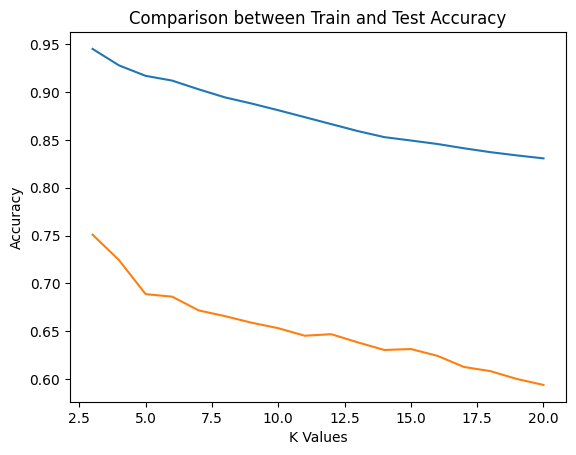

In [799]:
r2_train_list = []
r2_test_list = []
k_values = np.arange(3,21)
for k in k_values:
    knn_reg_norm1 = KNeighborsRegressor(n_neighbors=k, p = 2, n_jobs = -1)
    knn_reg_pipe_norm1 = make_pipeline(column_trans1, knn_reg_norm1)
    knn_reg_pipe_norm1.fit(x_train, y_train)
    
    r2_train = knn_reg_pipe_norm1.score(x_train, y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg_pipe_norm1.score(x_test, y_test)
    r2_test_list.append(r2_test)
    
plt.title('Comparison between Train and Test Accuracy')
plt.plot(k_values, r2_train_list)
plt.plot(k_values, r2_test_list)
plt.xlabel('K Values')
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

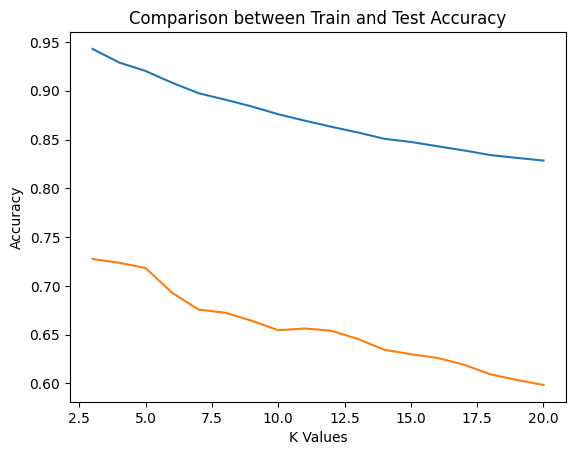

In [800]:
r2_train_list = []
r2_test_list = []
k_values = np.arange(3,21)
for k in k_values:
    knn_reg_norm1 = KNeighborsRegressor(n_neighbors=k, p = 1, n_jobs = -1)
    knn_reg_pipe_norm1 = make_pipeline(column_trans1, knn_reg_norm1)
    knn_reg_pipe_norm1.fit(x_train, y_train)
    
    r2_train = knn_reg_pipe_norm1.score(x_train, y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg_pipe_norm1.score(x_test, y_test)
    r2_test_list.append(r2_test)
    
plt.title('Comparison between Train and Test Accuracy')
plt.plot(k_values, r2_train_list)
plt.plot(k_values, r2_test_list)
plt.xlabel('K Values')
plt.ylabel("Accuracy")

# KNN mode with standardization

In [801]:
norm_col1 = ['min_price', 'max_price', 'year', 'seller_type', 'km_driven', 'owner_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']

x1 = df1[norm_col1]
x = df1.drop(['model','min_price', 'max_price', 'year', 'seller_type', 'km_driven', 'owner_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'], axis= 1)
y = df1['selling_price']

stan_scalar = StandardScaler()
array3 = stan_scalar.fit_transform(x1)
new_x1_stan_df = pd.DataFrame(array3, columns = x1.columns)
new_x1_stan_df
x = pd.concat([x, new_x1_stan_df], axis = 1)


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 42)
# x_train

In [802]:
knn_reg_std = KNeighborsRegressor(n_jobs = -1)
knn_reg_pipe_std = make_pipeline(column_trans1, knn_reg_std)
knn_reg_pipe_std.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun',...
       'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier', 'Renault',
       'Rolls-Royce', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]),
                                                  ['full_name',
                                                   'brand_name'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_jobs=-1))])

In [803]:
#Training data Evaluation #########################################################################################

y_pred_train_knn = knn_reg_pipe_std.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train_knn)
print("MSE Train KNN_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE Train KNN_reg = ", rmse)

mae = mean_absolute_error(y_train, y_pred_train_knn)
print("MAE Train KNN_reg = ", mae)

r_squared = r2_score(y_train, y_pred_train_knn)
print("R2_Squared Train KNN_reg = ", r_squared)

print()
print("*"*60)
print()

#Testing data Evaluation #########################################################################################

y_pred_test_knn = knn_reg_pipe_std.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test_knn)
print("MSE test KNN_reg = ", mse)

rmse = np.sqrt(mse)
print("RMSE test KNN_reg = ", rmse)

mae = mean_absolute_error(y_test, y_pred_test_knn)
print("MAE test KNN_reg = ", mae)

r_squared = r2_score(y_test, y_pred_test_knn)
print("test test KNN_reg = ", r_squared)

MSE Train KNN_reg =  45710295683.04605
RMSE Train KNN_reg =  213799.66249516403
MAE Train KNN_reg =  84931.24861423222
R2_Squared Train KNN_reg =  0.9355393593846103

************************************************************

MSE test KNN_reg =  389331712922.363
RMSE test KNN_reg =  623964.5125504839
MAE test KNN_reg =  120645.82101847228
test test KNN_reg =  0.700026091256743


Text(0, 0.5, 'Accuracy')

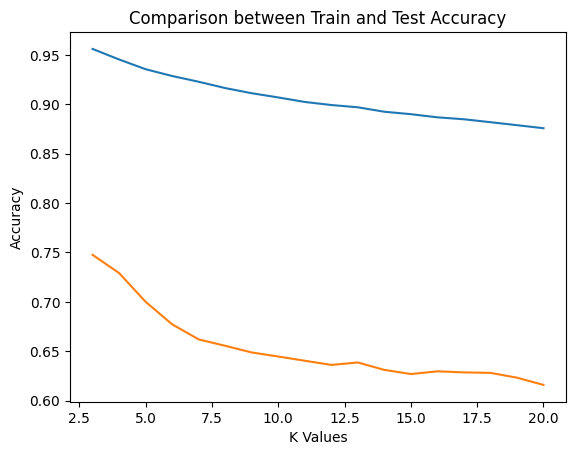

In [804]:
r2_train_list = []
r2_test_list = []
k_values = np.arange(3,21)
for k in k_values:
    knn_reg_stad1 = KNeighborsRegressor(n_neighbors=k, p = 2, n_jobs = -1)
    knn_reg_pipe_stand1 = make_pipeline(column_trans1, knn_reg_stad1)
    knn_reg_pipe_stand1.fit(x_train, y_train)
    
    r2_train = knn_reg_pipe_stand1.score(x_train, y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg_pipe_stand1.score(x_test, y_test)
    r2_test_list.append(r2_test)
    
plt.title('Comparison between Train and Test Accuracy')
plt.plot(k_values, r2_train_list)
plt.plot(k_values, r2_test_list)
plt.xlabel('K Values')
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

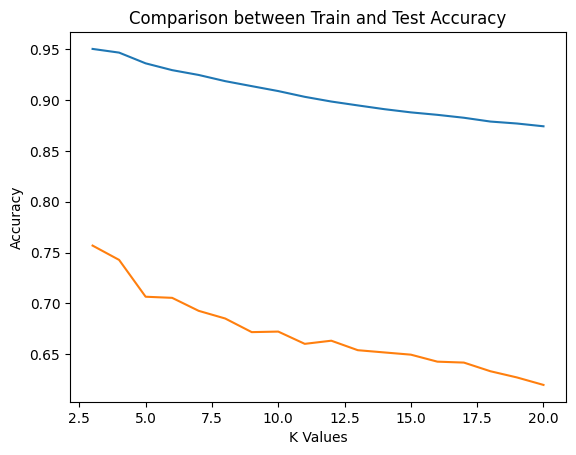

In [805]:
r2_train_list = []
r2_test_list = []
k_values = np.arange(3,21)
for k in k_values:
    knn_reg_stad1 = KNeighborsRegressor(n_neighbors=k, p = 1, n_jobs = -1)
    knn_reg_pipe_stand1 = make_pipeline(column_trans1, knn_reg_stad1)
    knn_reg_pipe_stand1.fit(x_train, y_train)
    
    r2_train = knn_reg_pipe_stand1.score(x_train, y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg_pipe_stand1.score(x_test, y_test)
    r2_test_list.append(r2_test)
    
plt.title('Comparison between Train and Test Accuracy')
plt.plot(k_values, r2_train_list)
plt.plot(k_values, r2_test_list)
plt.xlabel('K Values')
plt.ylabel("Accuracy")

In [ ]:
['maritui suziki', 'alto', 38,]